# Visualising the World Development Indicators

There's a nice feeling being able to use some jupyter's computational muscle for exploratory/visual analysis.

I came across the indicators browsing through Kaggle's datasets (https://www.kaggle.com/worldbank/world-development-indicators). 

You can directly download them from: http://databank.worldbank.org/data/download/WDI_csv.zip.

In [2]:
# Our numerical workhorses
import numpy as np
import pandas as pd

# Import pyplot for plotting
import matplotlib.pyplot as plt
%matplotlib inline

#pd.set_option('display.mpl_style', 'default')
import matplotlib
matplotlib.style.use('ggplot')

plt.rcParams["figure.figsize"] = (18,4)

import zipfile

# we'll load the data directly from the zip file

z = zipfile.ZipFile('data/WDI_csv.zip')
series = pd.read_csv(z.open('WDI_{}.csv'.format('Series')))
country = pd.read_csv(z.open('WDI_{}.csv'.format('Country')))
data = pd.read_csv(z.open('WDI_{}.csv'.format('Data')))
description = pd.read_csv(z.open('WDI_{}.csv'.format('Description')))

#pd.set_option('display.max_colwidth', -1)
pd.set_option('display.width', 120)

# transforming the column names will allow us to use the 'dot syntax' of accessing columns eg `series.Topic`
for df in [series, country, data, description]:
    df.columns = [x.replace(' ', '_') for x in df.columns]

# Data structure reference

It's good to have a quick view inside the available data. Jupyter allows us to just leave it here for reference.

In [3]:
series[:2]

,Series_Code,Topic,Indicator_Name,Short_definition,Long_definition,Unit_of_measure,Periodicity,Base_Period,Other_notes,Aggregation_method,Limitations_and_exceptions,Notes_from_original_source,General_comments,Source,Statistical_concept_and_methodology,Development_relevance,Related_source_links,Other_web_links,Related_indicators,License_Type
0,AG.AGR.TRAC.NO,Environment: Agricultural production,"Agricultural machinery, tractors",NaN,Agricultural machinery refers to the number of...,NaN,Annual,NaN,NaN,Sum,The data are collected by the Food and Agricul...,NaN,NaN,"Food and Agriculture Organization, electronic ...",A tractor provides the power and traction to m...,Agricultural land covers more than one-third o...,NaN,NaN,NaN,Open
1,AG.CON.FERT.PT.ZS,Environment: Agricultural production,Fertilizer consumption (% of fertilizer produc...,NaN,Fertilizer consumption measures the quantity o...,NaN,Annual,NaN,NaN,Weighted average,The FAO has revised the time series for fertil...,NaN,NaN,"Food and Agriculture Organization, electronic ...",Fertilizer consumption measures the quantity o...,"Factors such as the green revolution, has led ...",NaN,NaN,NaN,Open


In [4]:
country[:2]


,Code,Short_Name,Table_Name,Long_Name,2-alpha_code,Currency_Unit,Special_Notes,Region,Income_Group,WB-2_code,...,Government_Accounting_concept,IMF_data_dissemination_standard,Latest_population_census,Latest_household_survey,Source_of_most_recent_Income_and_expenditure_data,Vital_registration_complete,Latest_agricultural_census,Latest_industrial_data,Latest_trade_data,Latest_water_withdrawal_data
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,...,NaN,NaN,2010,NaN,NaN,Yes,NaN,NaN,2014,NaN
1,ADO,Andorra,Andorra,Principality of Andorra,AD,Euro,The base year has changed to 2000. Price valua...,Europe & Central Asia,High income: nonOECD,AD,...,NaN,NaN,2011. Population data compiled from administra...,NaN,NaN,Yes,NaN,NaN,2014,NaN


In [5]:
data[:2]

,Country_Name,Country_Code,Indicator_Name,Indicator_Code,1960,1961,1962,1963,1964,1965,...,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015
0,Arab World,ARB,"2005 PPP conversion factor, GDP (LCU per inter...",PA.NUS.PPP.05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"2005 PPP conversion factor, private consumptio...",PA.NUS.PRVT.PP.05,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Setting up the Toolset

It should be easy to select an Indicator for a given Country and then plot the time series.
Let's get some functions and variables to help us out here.

In [6]:
# data transformation tools

def todf(df):
    '''Transposes the matrix, so that the Years are in rows.'''
    df = df.stack().unstack(0)
    df.columns = df.iloc[1]
    return df[4:]

def todf_indicator(df, indicator):
    return todf(df[df.Indicator_Name==indicator])

def plot_indicator(df, indicator, kind='line'):
    todf_indicator(df, indicator).plot(title=indicator, kind=kind)

def plot_indicators(df, indicators, kind='line'):
    data = [todf_indicator(df, indicator) for indicator in indicators]
    data = pd.concat(data, axis=1)
    title=data.columns[0]
    data.columns = indicators
    data.plot(title=title, kind=kind)

# a few useful shortcuts
    
pol = data[data.Country_Name=="Poland"]
uk = data[data.Country_Name=="United Kingdom"]
usa = data[data.Country_Name=="United States"]
ger = data[data.Country_Name=="Germany"]
china = data[data.Country_Name=="China"]
rus = data[data.Country_Name=="Russian Federation"]

all = pd.concat([pol, usa, ger, uk, china, rus])
all_but_china = all[all.Country_Name!="China"]

In [7]:
# some data lookup tools

inCountry = lambda name: all.Country_Name==name
indicatorContains = lambda s: all.Indicator_Name.str.contains(s)

# let's show some indicators
pd.unique(all[indicatorContains('Population') & inCountry('Poland')].Indicator_Name)


array(['Population ages 65 and above (% of total)',
       'Population density (people per sq. km of land area)',
       'Population growth (annual %)', 'Population in largest city',
       'Population in the largest city (% of urban population)',
       'Population in urban agglomerations of more than 1 million',
       'Population in urban agglomerations of more than 1 million (% of total population)',
       'Population living in areas where elevation is below 5 meters (% of total population)',
       'Population, ages 0-14 (% of total)',
       'Population, ages 15-64 (% of total)',
       'Population, female (% of total)', 'Population, total'], dtype=object)

# Analysing pollution

Air pollution information sounds intriguing. Let's start with that.

## Poland
Although there's a remarkable drop in overall PM2.5 pollution between 1990 to 2000 we have to wait for another 11 years (till 2011) to see it falling below 100% (just about) of the WHO guideline value.

## Germany
Follows the same trajectory as Poland, which is somewhat surprising. Could the common drop in the air pollution in the 90s be indicative of the transformation from the post-communist heavy industry era of the East Germany?

## China
Sadly, not even close to falling within the WHO guideline. Removed from the absolute air pollution chart to make the other trends visible. How much of it is just shipping the pollution from the west?

## US and UK
Remarkable drop in pollution levels throughout the period in question. Is it the targeted policies, 'outsourcing' the heavy polluting industry to China, both?



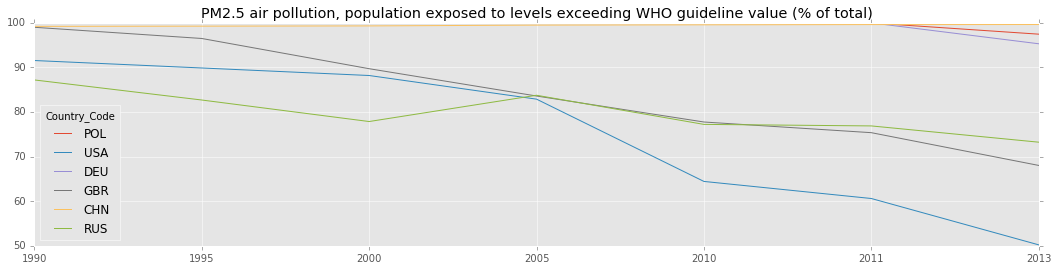

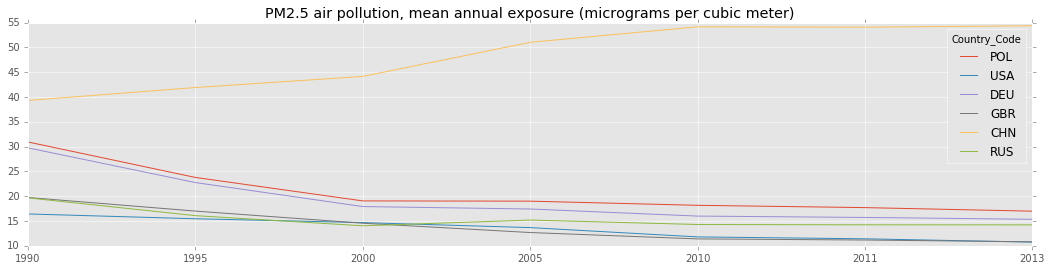

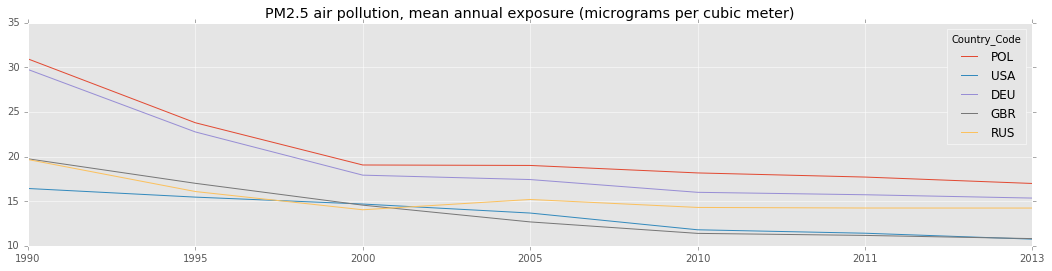

In [8]:
plot_indicator(all, 'PM2.5 air pollution, population exposed to levels exceeding WHO guideline value (% of total)')
plot_indicator(all, 'PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)')

plot_indicator(all_but_china, 'PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)')


# Population

Easily visible trend of replacing <14 with >65 with varying severity. Most notably US and UK seem to fare best in comparison to other countries.

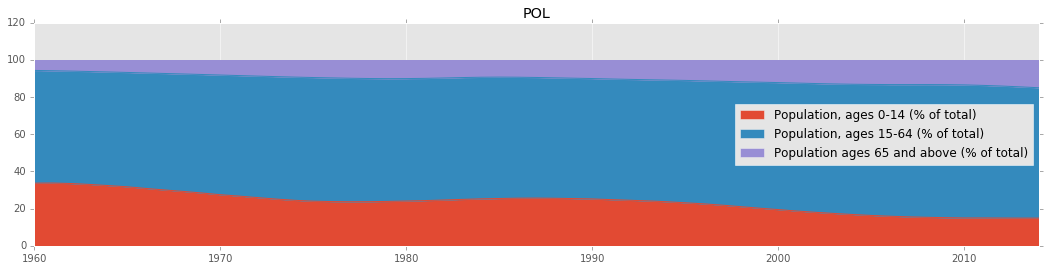

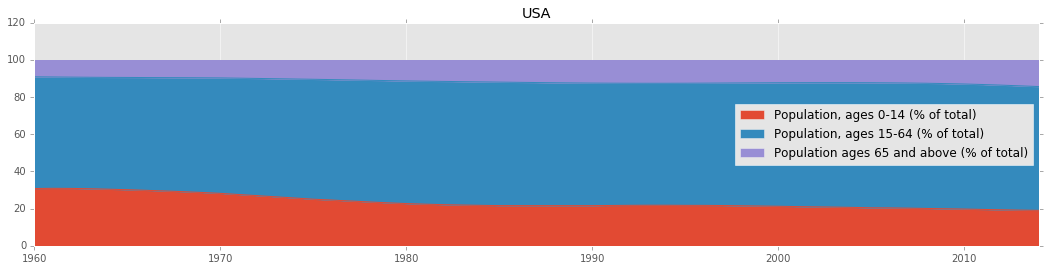

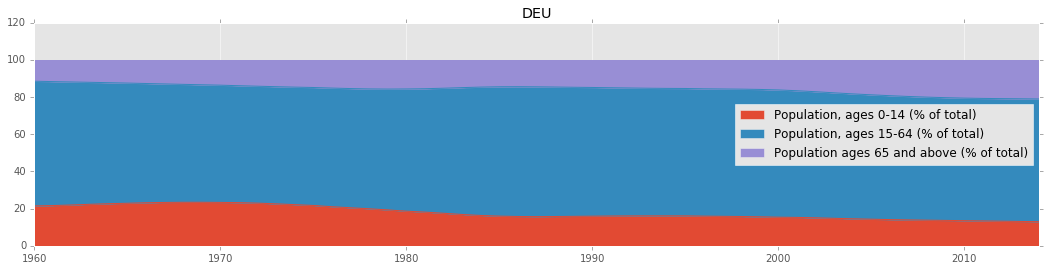

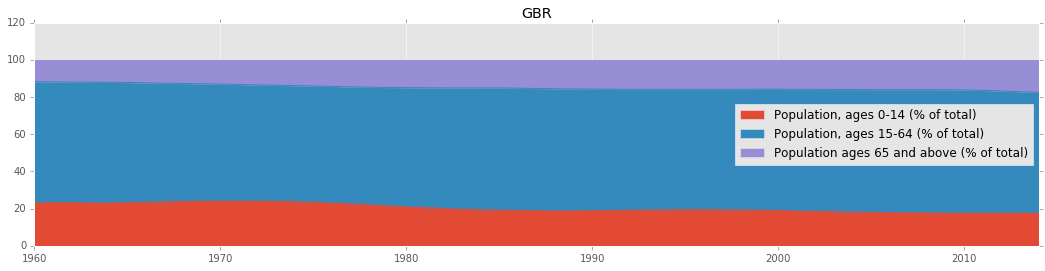

In [9]:
for country in [pol, usa, ger, uk]:
    plot_indicators(country, 
                    ['Population, ages 0-14 (% of total)', 
                     'Population, ages 15-64 (% of total)', 
                     'Population ages 65 and above (% of total)'], kind='area')

## Young to Old ratio
A question follows - how many under 14 years old are per one over 64 years old? The following graph nicely depicts this ratio to go from 6 in Poland in the 60s to 1 in 2014. Here again UK, but especially US do relatively well and Germany worst.

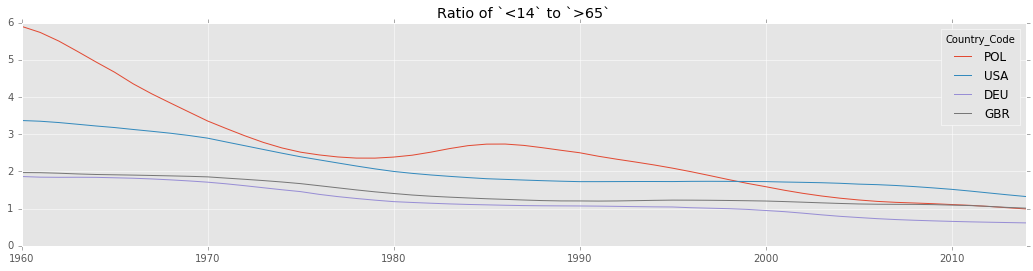

In [10]:
def get_young2old_ratio(dfs): 
    ratio = pd.DataFrame()
    for country in dfs:
        data = todf_indicator(country, 'Population, ages 0-14 (% of total)')
        data2 = todf_indicator(country, 'Population ages 65 and above (% of total)')
        ratio = pd.concat([ratio, data/data2], axis=1)
    return ratio
    
get_young2old_ratio([pol, usa, ger, uk]).plot(title='Ratio of `<14` to `>65`')

# Economy

## GDP as a proxy for the quality of life

The following two graphs show an interesting observation that if we have hopes to use GDP per capita as a proxy for measuring the general quality of life, then it's better to use the `GDP` measured in `PPP` rather than `current USD`. To see this have a look at the bumps on the `current USD` part around 2008-2009.

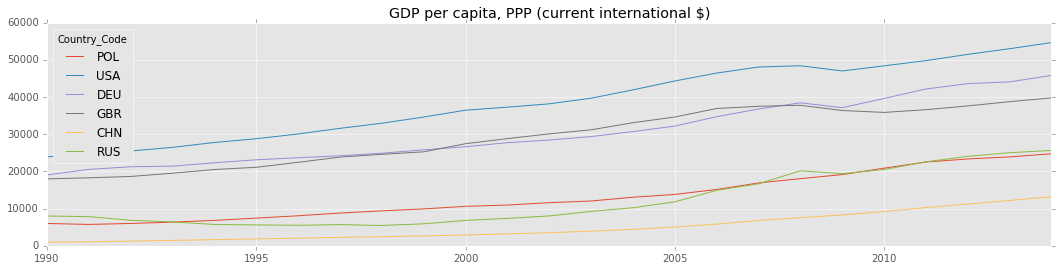

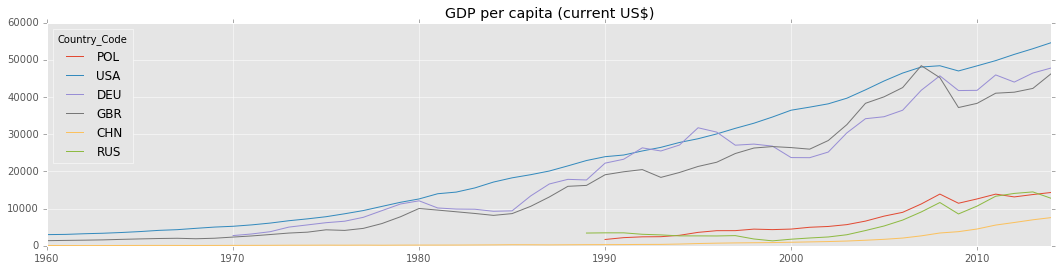

In [11]:
plot_indicator(all, 'GDP per capita, PPP (current international $)')
plot_indicator(all, 'GDP per capita (current US$)')


## Total economic GDP power

Varies depending on on whether we're using the PPP or USD calculation.
Contrary to the quality of life argument above for assessing the countries total 'power' (so the ability to have an impact) it's probably better to use the `current USD` chart.

What is especially remarkable is the growth of the US economy not justified really by the `per capita` figures charted above. The population growth helps to understand this.

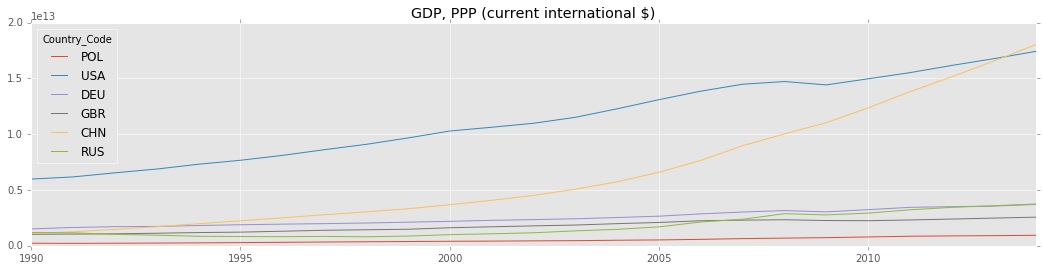

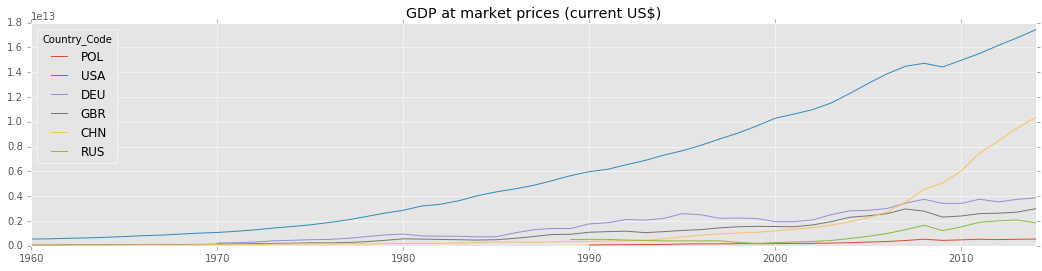

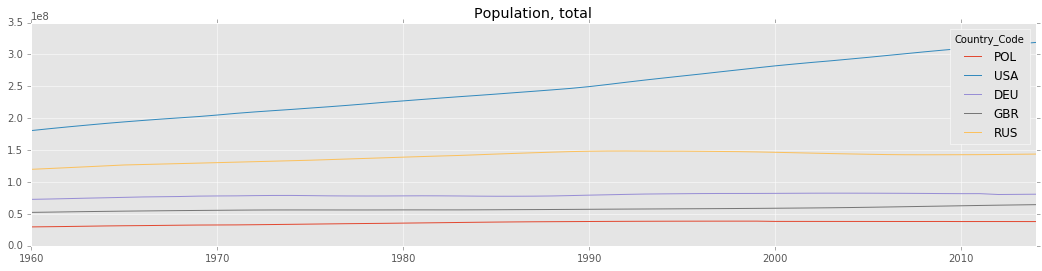

In [12]:
plot_indicator(all, 'GDP, PPP (current international $)')
plot_indicator(all, 'GDP at market prices (current US$)')
plot_indicator(all_but_china, 'Population, total')